In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
% matplotlib inline

Even though it is called importance sampling, it is actually for calculating the expectation of function $f$ w.r.t $p$, which is hard to sample but easy to evaluate its variant $\tilde{p}(x) = Z_p p(x)$. 

Some examples shown here are based on youtube [video](https://www.youtube.com/watch?v=3Mw6ivkDVZc)

In this implementation, the proposed distribution $q(x)$ and the target distribution $p(x)$ are both assumed to be Gaussian.

the function $f$ is based on $e^{ -k* \mid x - b \mid}$

In [3]:
class importance_sampling:
    def __init__(self, proposed_mean, proposed_std, underlying_mean, underlying_std, Z_p, Z_q):
        self.proposed_mean = proposed_mean
        self.proposed_std = proposed_std
        self.underlying_mean = underlying_mean
        self.underlying_std = underlying_std
        self.Z_p = Z_p
        self.Z_q = Z_q
        
    
    def distribution_overview(self, x):
        q = norm.pdf(x, loc= self.proposed_mean, scale= self.proposed_std)
        p = norm.pdf(x, loc= self.underlying_mean, scale= self.underlying_std)
        p_tilde = self.Z_p* p
        q_tilde = self.Z_q* q
        
        plt.figure(figsize=(8, 8))
        plt.plot(x, q, "--", label= "proposed distribution $q$",  c= "black")
        plt.plot(x, p, "--", label= "target distribution $p$",  c= "blue")
        plt.plot(x, p_tilde, label= r"distribution $\tilde{p}$", c= "blue")
        plt.plot(x, q_tilde, label= r"distribution $\tilde{q}$",  c= "black")
        plt.xlabel("x")
        plt.legend()
        plt.tight_layout()
        
    def general_overview(self, x, k, b):
        self.k = k
        self.b = b
        
        q = norm.pdf(x, loc= self.proposed_mean, scale= self.proposed_std)
        p = norm.pdf(x, loc= self.underlying_mean, scale= self.underlying_std)
        p_tilde = self.Z_p* p
        q_tilde = self.Z_q* q

        f = np.exp(-self.k* np.abs(x - self.b))
        plt.figure(figsize=(8, 8))
        plt.plot(x, f, label= "functioin $f$", c = "orange")
        plt.plot(x, q, "--", label= "proposed distribution $q$",  c= "black")
        plt.plot(x, p, "--", label= "target distribution $p$",  c= "blue")
        plt.plot(x, p_tilde, label= r"distribution $\tilde{p}$", c= "blue")
        plt.plot(x, q_tilde, label= r"distribution $\tilde{q}$",  c= "black")
        plt.xlabel("x")
        plt.legend()
        plt.tight_layout()

    #def fit(self):

# Case 1:

Suppose the target distribution $p(x) \sim \mathcal{N}(1, 3^2)$, proposed distribution $q(x) \sim \mathcal{N}(0, 1^2)$ and $f(x) = e^{-2 \mid x \mid}$

In [4]:
q_mean = 0
q_std = 1
p_mean = 1
p_std = 3
Z_p = 4
Z_q = 2

is_obj = importance_sampling(proposed_mean= q_mean, proposed_std= q_std, 
                             underlying_mean= p_mean, underlying_std= p_std, Z_p= Z_p, Z_q= Z_q)

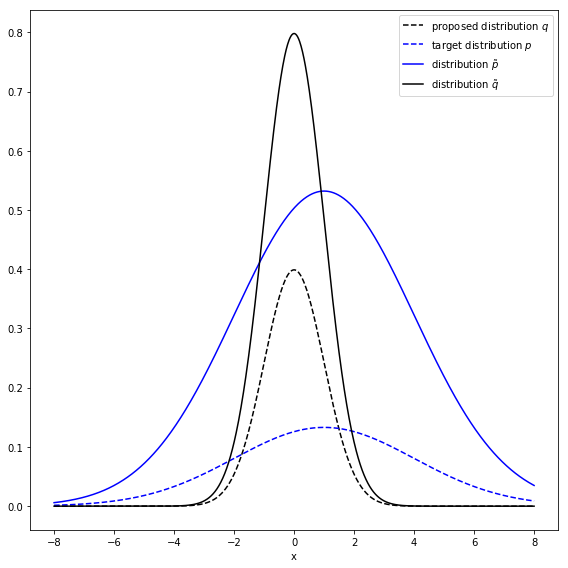

In [5]:
x = np.linspace(-8, 8, 1000)
is_obj.distribution_overview(x)

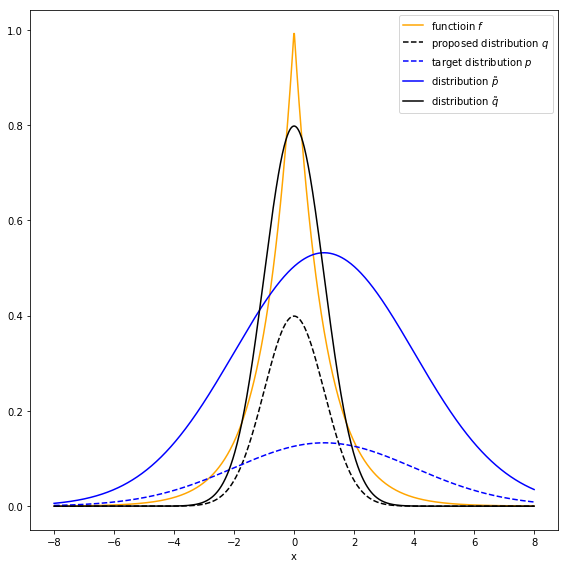

In [6]:
x = np.linspace(-8, 8, 1000)
is_obj.general_overview(x, k= 1, b= 0)